In [147]:
import re
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
import dtw
import gen

from sklearn.linear_model import HuberRegressor, Lasso, Ridge

In [148]:
jogging = pd.read_csv("../dataset_processing/jogging_ready.csv", index_col="Unnamed: 0")
walking = pd.read_csv("../dataset_processing/walking_ready.csv", index_col="Unnamed: 0")

jogging.columns = jogging.columns.astype(int)
walking.columns = walking.columns.astype(int)

In [149]:
def norm_transform(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

In [150]:
start_point = 0
model_length = 38

x = norm_transform(walking.mean())
x = x.iloc[start_point:model_length]

zerro_padding_size = 0
x = np.hstack([np.zeros(zerro_padding_size), x.values, np.zeros(zerro_padding_size)])
x = pd.Series(x, np.arange(x.shape[0]))

y = norm_transform(walking.iloc[9, :])

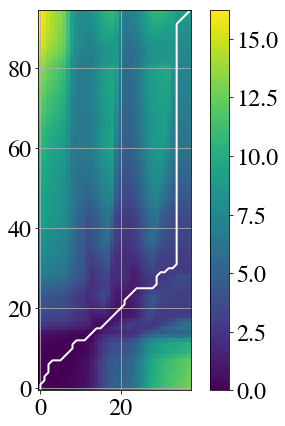

In [151]:
dist, acc, path = dtw.dtw(x, y, dist=lambda x, y: abs(x - y))

plt.figure(figsize=(7, 7))
plt.imshow(acc.T, origin='lower', interpolation='nearest')
plt.colorbar()
plt.plot(path[0], path[1], 'w')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24
plt.grid()

plt.ylim((-0.5, acc.shape[1]-0.5))
plt.xlim((-0.5, acc.shape[0]-0.5))

# plt.savefig("path.png", bbox_inches = "tight", format="png")
plt.show()

In [152]:
make_p = gen.EvolutionProcess(acc, 0.6)

In [153]:
pair, x = make_p(p_size=50, c_size=50, sample_size=5, select_size=20)
pair

(5.598047284098241, array([10, 32]))

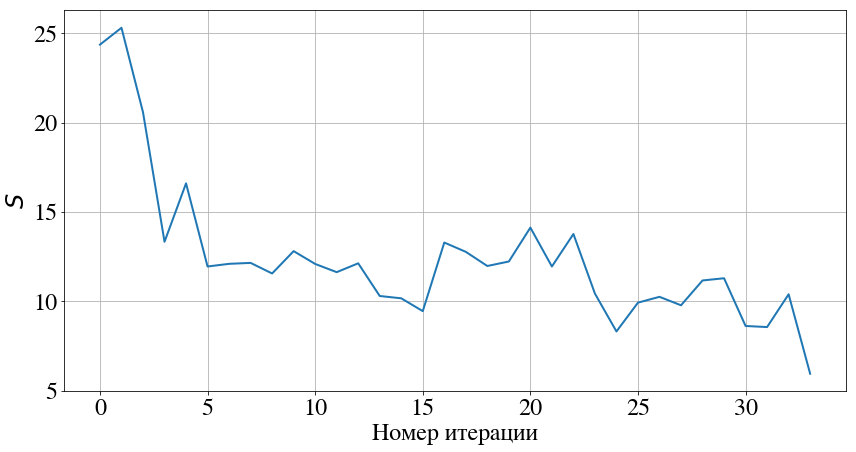

In [154]:
plt.figure(figsize=(14, 7))
plt.plot(x)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24
plt.grid()

plt.ylabel("$S$")
plt.xlabel("Номер итерации")
# plt.savefig("gen_iter.png", bbox_inches = "tight", format="png")
plt.show()

In [155]:
###########################################################
###########################################################
###########################################################
###########################################################
###########################################################
###########################################################
###########################################################
###########################################################

In [156]:
# first_max = 15
# second_max = 26

# first_ind = np.where(path[0]==first_max)[0][0]
# second_ind = np.where(path[0]==second_max)[0][0]
# model_coeffs_tr = np.array([0.5*(second_ind + first_ind), second_ind - first_ind])

# first_ind = np.where(path[1]==first_max)[0][0]
# second_ind = np.where(path[1]==second_max)[0][0]
# second_ind - first_ind
# sample_coeffs = np.array([0.5*(second_ind + first_ind), second_ind - first_ind])

# model_coeffs = np.array([0.5*(second_max + first_max), second_max - first_max])

# coeffs = sample_coeffs * model_coeffs / model_coeffs_tr
# shift_coeff, stretch_coeff = coeffs / model_coeffs

In [157]:
path_series = pd.Series(path[0], path[1])

In [158]:
# path_series = pd.Series(path[0], path[1]).loc[path_series.index.drop_duplicates()]

In [159]:
def diff_(x):
    return (x[-1] - x[0]) / (x.shape[0] - 1)

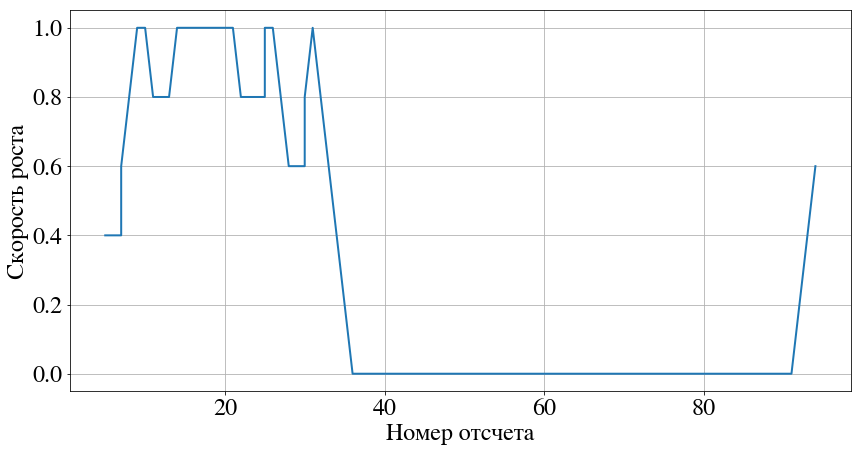

In [167]:
plt.figure(figsize=(14, 7))
path_rolling_diff = path_series.rolling(6).apply(diff_, raw=True)
plt.plot(path_rolling_diff)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24
plt.grid()

plt.ylabel("Скорость роста")
plt.xlabel("Номер отсчета")

# plt.savefig("diff_field.png", bbox_inches = "tight", format="png")
plt.show()

In [168]:
eps = 0.25
linear_path = path_rolling_diff.loc[(path_rolling_diff > 1 - eps) & (path_rolling_diff < 1 + eps)]

In [169]:
start_point, end_point = linear_path.index[0], linear_path.index[-1]

In [170]:
start_ind_x = np.where(path[0]==start_point)[0][0]
end_ind_x = np.where(path[0]==end_point)[0][0]

# start_ind_y = np.where(path[1]==start_point)[0][0]
# end_ind_y = np.where(path[1]==end_point)[0][0]

In [171]:
# path_x = path[0][start_ind_x: end_ind_x]
# path_y = path[1][start_ind_y: end_ind_y]

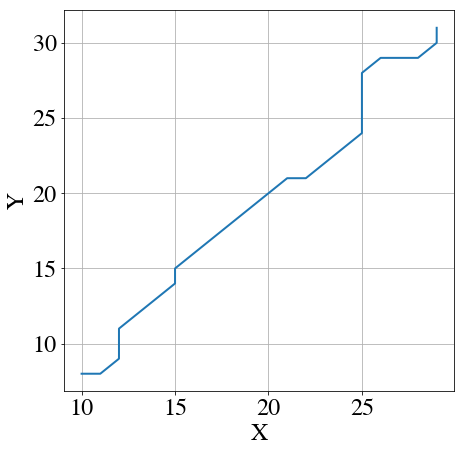

In [172]:
linear_path = pd.Series(path[0], path[1]).iloc[start_ind_x:end_ind_x]

plt.figure(figsize=(7, 7))

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24
plt.grid()

plt.plot(linear_path)


plt.ylabel("Y")
plt.xlabel("X")
# plt.savefig("diff_res.png", bbox_inches = "tight", format="png")
plt.show()

In [173]:
print(np.mean(linear_path.index), np.mean(linear_path.values)) 
print((linear_path.index[-1] - linear_path.index[0]) / (linear_path.values[-1] - linear_path.values[0]))

19.928571428571427 19.821428571428573
0.8260869565217391


In [20]:
x_fit = (path[0][start_point:model_length]).reshape(-1, 1)
x_fit = np.hstack([x_fit*0 + 1, x_fit])

In [21]:
y_fit = path[1][start_point:model_length]

In [22]:
w_dict = x.to_dict()
w_array = np.array([w_dict[i] for i in y_fit]) #  выпрямлять сигмоидой ??????

In [24]:
# reg = Ridge().fit(X=x_fit, y=y_fit)
reg = HuberRegressor().fit(X=x_fit, y=y_fit, sample_weight=w_array)
y_pred = reg.predict(x_fit)

reg.coef_

array([1.69432204, 0.82172447])

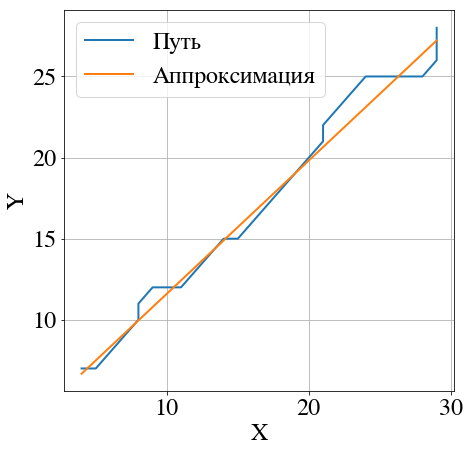

In [25]:
plt.figure(figsize=(7, 7))
plt.plot(path[0][start_point:model_length], path[1][start_point:model_length])
plt.plot(path[0][start_point:model_length], y_pred)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24
plt.grid()

plt.xlabel("X")
plt.ylabel("Y")
plt.legend(["Путь", "Аппроксимация"]) 
plt.savefig("lin_transform.png", bbox_inches = "tight", format="png")
plt.show()

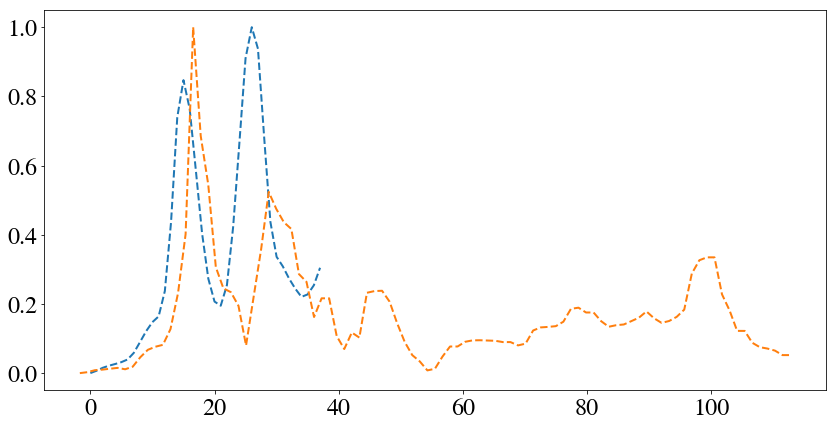

In [26]:
shift_coeff, stretch_coeff = reg.coef_

y_dtw = y.copy()

y_dtw.index = (1/stretch_coeff)*y_dtw.index
y_dtw.index = y_dtw.index - shift_coeff

plt.figure(figsize=(14, 7))
plt.plot(x, "--")
plt.plot(y_dtw, "--")

In [27]:
model_s = norm_transform(walking.mean())
class_s = y_dtw.copy()

In [28]:
class_s.index = np.round(class_s.index).astype(int)

# model_s = model_s[~model_s.index.duplicated(keep="last")]
y_dtw = class_s[~class_s.index.duplicated(keep="last")]

In [29]:
# у модели индексы не трогать !!!!

In [30]:
# ind_x = class_s.index
# ind_y = model_s.index
# ind = np.intersect1d(ind_x, ind_y)

In [ ]:
x = class_s.loc[ind]
x = x.values.reshape(-1, 1)
x = np.hstack([x * 0 + 1, x])

y = model_s.loc[ind]
y = y.values

reg = Ridge(alpha=0)
reg.fit(X=x, y=y)

coef_ = reg.coef_

print(coef_)
return coef_[0] + coef_[1]*class_s

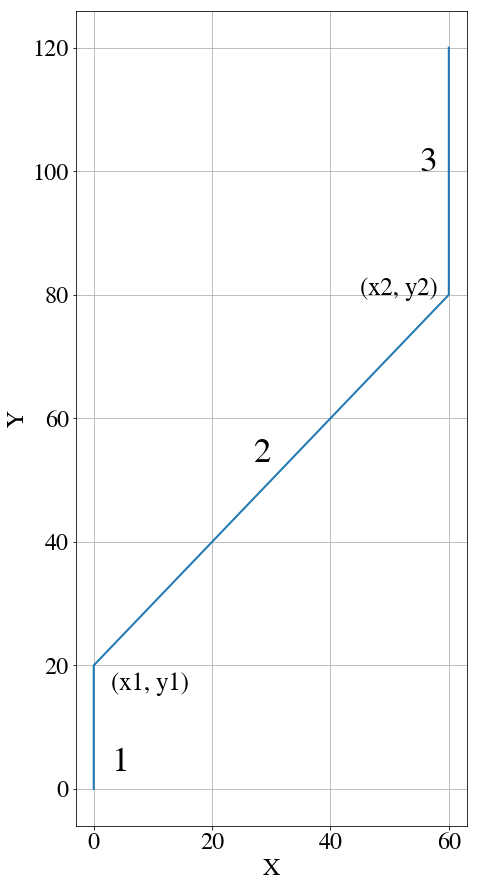

In [52]:
plt.figure(figsize=(7, 15))

plt.plot(pd.Series([0, 20, 80, 120], [0, 0, 60, 60]))
# plt.plot(pd.Series([0, 30, 70, 120], [0, 0, 60, 60]))
# plt.plot(pd.Series([0, 120], [0, 60]))

# plt.axvline(x=34, ymin=0.65, ymax=30)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24
plt.grid()

plt.text(3, 3, r'1', fontsize=35)
plt.text(27, 53, r'2', fontsize=35)
plt.text(55, 100, r'3', fontsize=35)

plt.text(3, 16, r'(x1, y1)', fontsize=25)
plt.text(45, 80, r'(x2, y2)', fontsize=25)

plt.xlabel("X")
plt.ylabel("Y")
# plt.savefig("lin_exaple.png", bbox_inches = "tight", format="png")
plt.show()

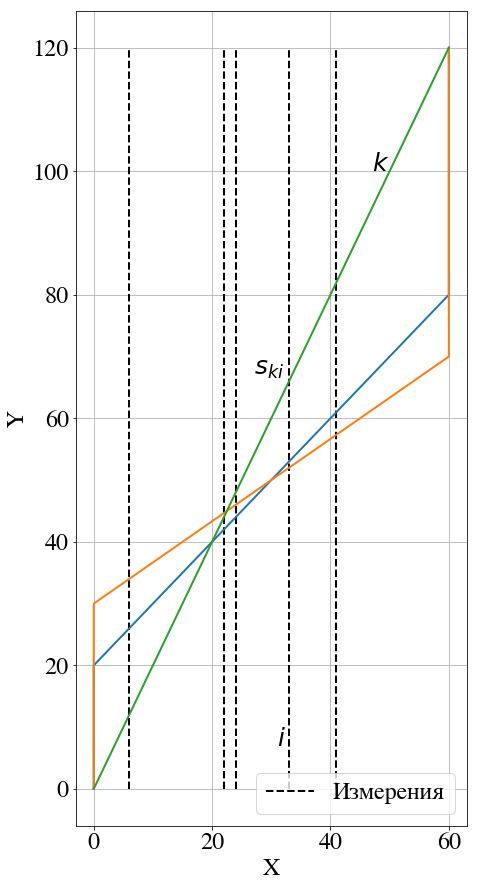

In [84]:
plt.figure(figsize=(7, 15))

plt.plot(pd.Series([0, 120], [33, 33]), "--", color="k")
plt.plot(pd.Series([0, 120], [22, 22]), "--", color="k")
plt.plot(pd.Series([0, 120], [41, 41]), "--", color="k")
plt.plot(pd.Series([0, 120], [24, 24]), "--", color="k")
plt.plot(pd.Series([0, 120], [6, 6]), "--", color="k")

plt.plot(pd.Series([0, 20, 80, 120], [0, 0, 60, 60]))
plt.plot(pd.Series([0, 30, 70, 120], [0, 0, 60, 60]))
plt.plot(pd.Series([0, 120], [0, 60]))

# plt.axvline(x=34, ymin=0.65, ymax=30)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24
plt.grid()

# plt.text(3, 3, r'1', fontsize=35)
# plt.text(27, 53, r'2', fontsize=35)
# plt.text(55, 100, r'3', fontsize=35)

# plt.text(3, 16, r'(x1, y1)', fontsize=25)
# plt.text(45, 80, r'(x2, y2)', fontsize=25)
plt.text(27, 67, r'$s_{ki}$', fontsize=25)
plt.text(31, 7, r'$i$', fontsize=25)
plt.text(47, 100, r'$k$', fontsize=25)

plt.legend(["Измерения"]) 
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig("lin_exaple_sample.png", bbox_inches = "tight", format="png")
plt.show()